In [1]:
import torch

## Tensors

### Scalar

In [3]:
# A Holds a single scalar value
a = torch.tensor(3.0)
a.shape

torch.Size([])

### Vector

In [4]:
# Holds a number of values in a list-like format of 1-dimesion
b = torch.tensor([3.2,4.5,6.4,3.3])
b.shape

torch.Size([4])

### Matrix 

In [9]:
# Has the shape of a 2-dimensional aray
c = torch.tensor([[4.0,3.2,5.6], [3.3, 4.8, 9.0], [60.5,20.3, 44.5], [42.3, 66.1, 0.6]])
c.shape

torch.Size([4, 3])

### Tensor

In [10]:
# A rank n tensor (n>2) e.g 3D, 4D ...(nD e.t.c)
d = torch.tensor([[[3.0,1.1, 3.2],[4.4,3.3,2.5]], [[44.5,6,4.4], [6.1,32.2,4]]])
d.shape

torch.Size([2, 2, 3])

In [11]:
n = torch.randn([2,2,4,2])
print(f"N shape {n.shape}")
print(n)

N shape torch.Size([2, 2, 4, 2])
tensor([[[[-0.6343,  0.3840],
          [ 1.6304, -0.8249],
          [ 0.4925,  0.0853],
          [ 2.0578, -1.1322]],

         [[ 2.4679, -0.7362],
          [ 1.5129,  1.1671],
          [ 0.4070, -0.2831],
          [-0.1039, -0.4682]]],


        [[[ 0.2292,  0.4997],
          [-3.7987, -0.3142],
          [ 0.9792,  1.5376],
          [-0.3235,  0.1918]],

         [[ 1.0711, -1.3334],
          [-1.2034,  1.4929],
          [ 1.1174, -0.6807],
          [ 0.7394,  2.1025]]]])


In [13]:
n[0][1][3][1] = 100
print(n)

tensor([[[[-6.3431e-01,  3.8399e-01],
          [ 1.6304e+00, -8.2488e-01],
          [ 4.9250e-01,  8.5330e-02],
          [ 2.0578e+00, -1.1322e+00]],

         [[ 2.4679e+00, -7.3621e-01],
          [ 1.5129e+00,  1.1671e+00],
          [ 4.0703e-01, -2.8309e-01],
          [-1.0391e-01,  1.0000e+02]]],


        [[[ 2.2918e-01,  4.9973e-01],
          [-3.7987e+00, -3.1420e-01],
          [ 9.7915e-01,  1.5376e+00],
          [-3.2349e-01,  1.9180e-01]],

         [[ 1.0711e+00, -1.3334e+00],
          [-1.2034e+00,  1.4929e+00],
          [ 1.1174e+00, -6.8074e-01],
          [ 7.3942e-01,  2.1025e+00]]]])


## Storing Gradients

### Example 1:

In [146]:
import torch.nn as nn
from torchviz import make_dot
import numpy as np
import torch.optim as optim
import pandas as pd

In [74]:
a = torch.tensor(3.14, requires_grad=True)
print(a)

tensor(3.1400, requires_grad=True)


In [75]:
b = torch.tensor([1.0,2.0,3.0])
print(b)

tensor([1., 2., 3.])


### Example 2:

Prediction z: tensor([1.9000], grad_fn=<AddBackward0>)
dL/dw: -0.5599997639656067
dL/db: -0.39999985694885254


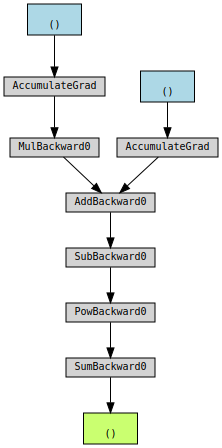

In [76]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)
x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w,x), b)
print(f"Prediction z: {z}")
loss = (y - z).pow(2).sum()
loss.backward()
print(f"dL/dw: {w.grad}")
print(f"dL/db: {b.grad}")
make_dot(loss)

In [77]:
print(f"W: {w}, b: {b}")

W: 1.0, b: 0.5


In [78]:
lr = 0.001
with torch.no_grad():
    w = w - lr*w.grad # new w value after backpass
    b = b - lr*b.grad # new b value after backpass
    print(f"W: {w}, b: {b}")

# Print current loss
print(f"Current loss: {loss}")
# calculate and print loss after update

z = torch.add(torch.mul(w,x), b)
loss = (y - z).pow(2).sum()
print(f"Updated loss: {loss}")
print(f"Prediction z: {z}")


W: 1.0005600452423096, b: 0.5004000067710876
Current loss: 0.03999997302889824
Updated loss: 0.039527732878923416
Prediction z: tensor([1.9012])


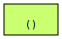

In [79]:
make_dot(loss)